In [11]:
#!pip install graphviz

In [1]:
from sklearn.feature_extraction import DictVectorizer  # 将特征值转化成向量
from sklearn import preprocessing # 将标记转化成向量
from sklearn import tree # 决策树
import csv
import graphviz
import numpy as np

In [4]:
# 读取csv文件
filename = 'AllElectronics.csv'
with open(filename, 'r') as f:
    reader = csv.reader(f)
    header_row = next(reader)
    # 打印一下表头，csv文件默认第一行是表头
    print(header_row)    

    print("="*118)
    
    # 提取每一行的特征值以及标记（label），将这些特征值存成一个字典的形式，方便后续的处理
    label_list, feature_list = [], [] 
    for row in reader:
        #print(row)
        label_list.append(row[-1])
        # 针对每一行存储特征值的字典
        rowDic = {}
        for index in range(1, len(row)-1):
            # 这里字典的键为列名，值为列名对应的特征值
            rowDic[header_row[index]] = row[index]
        feature_list.append(rowDic)    
    print(label_list)  
    print(feature_list)

['RID', 'age', 'income', 'student', 'credit_rating', 'class_buys_computer']
['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
[{'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'high', 'student': 'no', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'high', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'middle_aged', 'income': 'low', 'student': 'yes', 'credit_rating': 'excellent'}, {'age': 'youth', 'income': 'medium', 'student': 'no', 'credit_rating': 'fair'}, {'age': 'youth', 'income': 'low', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'senior', 'income': 'medium', 'student': 'yes', 'credit_rating': 'fair'}, {'age': 'yo

In [6]:
 """
    将feature_list直接转化成向量的形式
    如：age有三类， youth, middle_aged, senior 其向量表示法为
    age 是 youth 时，向量形式是 1 0 0
    age     分为        youth  middle_aged  senior
    income  分为        high   medium       low 
    student                  no   yes
    credit_rating 分为  fair   excellent
    
    student 分为        yes    no
    
    因此对第一行转化成向量的结果是
    0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
"""
# 实例化
vec = DictVectorizer() 
# 提取特征向量
dummyX = vec.fit_transform(feature_list).toarray()
print("="*118)
# 打印特征向量
print(dummyX)
# 打印特征向量对应的特征值名称
print("="*118)
print(vec.get_feature_names())
    
# 提取标记值并转化成向量的形式
# 实例化
lb = preprocessing.LabelBinarizer()
dummyY = lb.fit_transform(label_list)
print("="*118)
print(dummyY)     

[[0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 1. 0.]]
['age=middle_aged', 'age=senior', 'age=youth', 'credit_rating=excellent', 'credit_rating=fair', 'income=high', 'income=low', 'income=medium', 'student=no', 'student=yes']
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [26]:
# 按信息熵的方法选择属性判断方法
# clf = tree.DecisionTreeClassifier()  # 决策树分类器, 按默认方式分类

# clf = tree.DecisionTreeClassifier(criterion='entropy')  # 决策树分类器, 按信息熵分类C4.5
clf = tree.DecisionTreeClassifier(criterion='gini')  # 决策树分类器, CART

# 建模
clf = clf.fit(dummyX, dummyY)
print("="*118)
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [27]:
 #输出及可视化决策树信息熵
# outputfile = 'entropy.dot'
outputfile = 'gini.dot'
with open(outputfile, 'w') as ouf:
    ouf = tree.export_graphviz(clf, feature_names=vec.get_feature_names(), out_file = None)




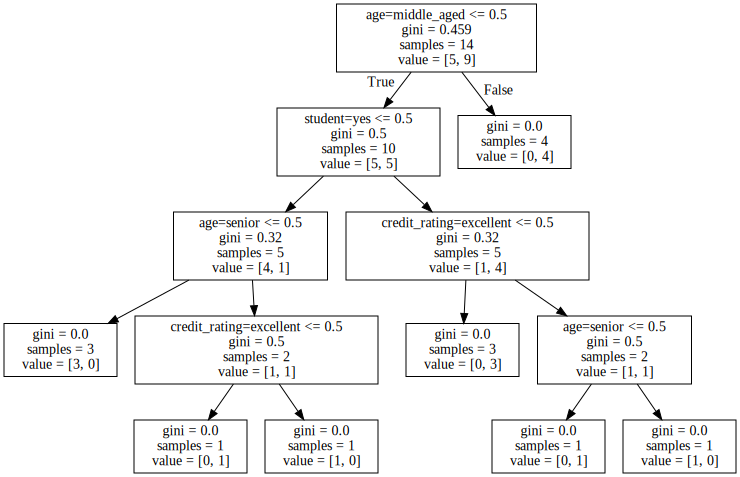

In [28]:
graph=graphviz.Source(ouf)
graph.render('my_cart')
graph


In [7]:
# 转化dot文件至png可视化决策树： 
!dot  -Tpng    entropy.dot   -o  entropy.png
#!dot  -Tpng    gini.dot   -o  gini.png



<img src="./entropy.png" height="830" width="795">
<img src="./gini.png" height="830" width="795">

In [18]:
print(vec.get_feature_names())

# 输入一行新的数据用以上的模型做预测
first_rowX = dummyX[0]
    
# 设置一个新的数据用以上模型预测结果
new_rowX =  np.copy(first_rowX) 
new_rowX[0] = 1
new_rowX[2] = 0
    
print("="*118)
print("first_rowX: {}".format(first_rowX))
print("new_rowX:   {}".format(new_rowX)) 
    
# 预测新数据
predictedY = clf.predict(np.array([new_rowX]))
predictedY = clf.predict(new_rowX.reshape(1, -1)) # predict()中的参数是一个二维数组的形式
print("first_rowX的结果是：   {}(不会买电脑)".format(dummyY[0][0]))
print("新的数据预测的结果是： {}(会买电脑)".format(predictedY[0]))

['age=middle_aged', 'age=senior', 'age=youth', 'credit_rating=excellent', 'credit_rating=fair', 'income=high', 'income=low', 'income=medium', 'student=no', 'student=yes']
first_rowX: [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
new_rowX:   [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
first_rowX的结果是：   0(不会买电脑)
新的数据预测的结果是： 1(会买电脑)
